In [1]:
import pandas as pd

##### In this notebook, I perform a transformation of csv data into a geo dataframe so as to avoid having to manually select census tracts from the Oakland City Government geojson file. I perform an analysis for the relevant tracts for bus route AC Transit 19. I also plot some maps in plotly that are unrelated to the final project just to have a go at it.

In [2]:
import geopandas as gpd

In [25]:
dataset = pd.read_csv("Census_Tracts_19_New.csv")

In [26]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 114 columns):
 #    Column             Non-Null Count  Dtype  
---   ------             --------------  -----  
 0    Geo_FIPS           28 non-null     int64  
 1    Geo_QName          28 non-null     object 
 2    Geo_FILEID         28 non-null     object 
 3    Geo_STUSAB         28 non-null     object 
 4    Geo_SUMLEV         28 non-null     int64  
 5    Geo_GEOCOMP        28 non-null     int64  
 6    Geo_LOGRECNO       28 non-null     int64  
 7    Geo_US             0 non-null      float64
 8    Geo_REGION         0 non-null      float64
 9    Geo_DIVISION       0 non-null      float64
 10   Geo_STATECE        0 non-null      float64
 11   Geo_STATE          28 non-null     int64  
 12   Geo_COUNTY         28 non-null     int64  
 13   Geo_COUSUB         0 non-null      float64
 14   Geo_PLACE          0 non-null      float64
 15   Geo_TRACT          28 non-null     int64  
 16   Geo_BLKG

##### Drop all null columns

In [27]:
dataset = dataset.dropna(axis=1,how="all")

##### Keep only relevant columns. In this case, I have chosen new variables to map including education attainment and percent of income spent on rent.

In [28]:
columns_to_keep = ['Geo_FIPS',
                   'SE_A12001_001',
                   'SE_A12001_002',
                   'SE_A12001_003',
                   'SE_A12001_004',
                   'SE_A12001_005',
                   'SE_A12001_006',
                   'SE_A12001_007',
                   'SE_A12001_008',
                   'SE_A18002_001',
                   'SE_A18002_002',
                   'SE_A18002_003',
                   'SE_A18002_004',
                   'SE_A18002_005',
                   'SE_A18002_006']

dataset2 = dataset[columns_to_keep]


In [29]:
dataset2.columns = ['FIPS',
'Population 25 years and over',
'Less than High School',
'High School Graduate',
'Some College',
'Bachelors Degree',
'Masters Degree',
'Professional School Degree',
'Doctorate Degree',
'Renter Occupied Housing Units',
'Less than 10 percent',
                   '10 to 29 percent',
                   '30 to 49 percent','50 percent or more',
                   'Not Computed']


In [30]:
dataset2.sample(5)

FIPS  Population 25 years and over  Less than High School  \
17  6001408800                          4354                   1656   
18  6001427100                          3226                    181   
9   6001403401                          2600                    327   
13  6001406202                          3322                   1450   
3   6001402802                          1148                    228   

    High School Graduate  Some College  Bachelors Degree  Masters Degree  \
17                  1034          1375               215              74   
18                   219           691              1179             568   
9                    219           423               738             661   
13                   670           595               452              71   
3                    277           288               218              95   

    Professional School Degree  Doctorate Degree  \
17                           0                 0   
18                         243               145   
9                          178                54   
13                          71                13   
3                           42                 0   

    Renter Occupied Housing Units  Less than 10 percent  10 to 29 percent  \
17                           1712                    12               590   
18                            401                     0               256   
9                            1767                    80               772   
13                           1162                    23               475   
3                             671                    21               216   

    30 to 49 percent  50 percent or more  Not Computed  
17               601                 433            76  
18                68                  45            32  
9                582                 286            47  
13               320                 288            56  
3                195                 227            12

##### I read the dataset with the relevant geometries.

In [31]:
geom_data = pd.read_csv('tracts_19.csv')

##### Rename columns and isolate columns that I want.

In [32]:
geom_data = geom_data.rename(columns = {"GEOID":"FIPS"})
geom_data = geom_data[["FIPS", "geometry"]]

In [35]:
geom_data.sample(5)

FIPS                                           geometry
0   6001402600  POLYGON ((-13612510.45838046 4551475.078864686...
22  6001427800  POLYGON ((-13611801.57586309 4547290.458687242...
16  6001407400  POLYGON ((-13604859.9150562 4547346.931692348,...
26  6001428700  POLYGON ((-13618004.96580703 4551059.048813967...
11  6001406000  POLYGON ((-13610739.69924041 4549621.597873631...

##### Check the nature of FIPS values to make sure they align. 

In [36]:
geom_data["FIPS"].dtype

dtype('int64')

##### Merge my two datasets. 

In [38]:
joined_data = dataset2.merge(right=geom_data, on="FIPS")
joined_data.head()

FIPS  Population 25 years and over  Less than High School  \
0  6001402600                           979                    257   
1  6001402700                          1577                    201   
2  6001402801                          2621                    438   
3  6001402802                          1148                    228   
4  6001402900                          1465                    221   

   High School Graduate  Some College  Bachelors Degree  Masters Degree  \
0                   128           259               244              62   
1                   166           282               581             271   
2                   296           303               971             410   
3                   277           288               218              95   
4                   271           238               407             242   

   Professional School Degree  Doctorate Degree  \
0                          21                 8   
1                          47                29   
2                         142                61   
3                          42                 0   
4                          30                56   

   Renter Occupied Housing Units  Less than 10 percent  10 to 29 percent  \
0                            517                    19               212   
1                            477                    16               230   
2                           1497                   226               657   
3                            671                    21               216   
4                           1025                    29               515   

   30 to 49 percent  50 percent or more  Not Computed  \
0               133                 116            37   
1                71                 105            55   
2               295                 319             0   
3               195                 227            12   
4               228                 222            31   

                                            geometry  
0  POLYGON ((-13612510.45838046 4551475.078864686...  
1  POLYGON ((-13612229.26534672 4552468.518270037...  
2  POLYGON ((-13611476.85690844 4553015.366054876...  
3  POLYGON ((-13611662.76045807 4552162.064995428...  
4  POLYGON ((-13611160.5982351 4551847.308131741,...

##### Create a new column for this with less than college education and corresponding percentage.

In [40]:
joined_data['Lessthancollege'] = joined_data['Less than High School'] + joined_data['High School Graduate']
joined_data['PCT_Lessthancollege'] = joined_data['Lessthancollege']/joined_data['Population 25 years and over']*100

##### Convert my dataset into a geodataframe.

In [42]:
joined_data['geometry'] = gpd.GeoSeries.from_wkt(joined_data['geometry'])
geo_df = gpd.GeoDataFrame(joined_data, geometry='geometry')

##### Those without college degrees are clustered around downtown Oakland and South Oakland near Fruitvale BART station. 

<AxesSubplot: >

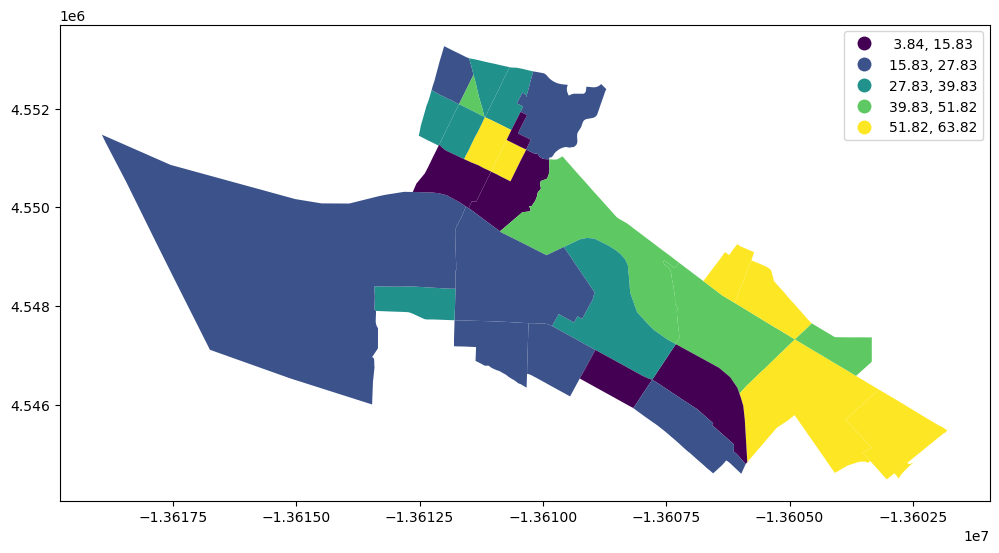

In [44]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Lessthancollege',
                 legend=True, 
                 scheme='equal_interval')

##### I create another column, those that are rent burdened (spending more than 30% of income on housing) and those that are not rent burdened.

In [45]:
geo_df['Notrentburdened'] = geo_df['Less than 10 percent'] + geo_df['10 to 29 percent']
geo_df['PCT_Notrentburdened'] = geo_df['Notrentburdened']/geo_df['Renter Occupied Housing Units']*100

##### I find that those who are not rent burdened tent to live in Downtown Oakland.

<AxesSubplot: >

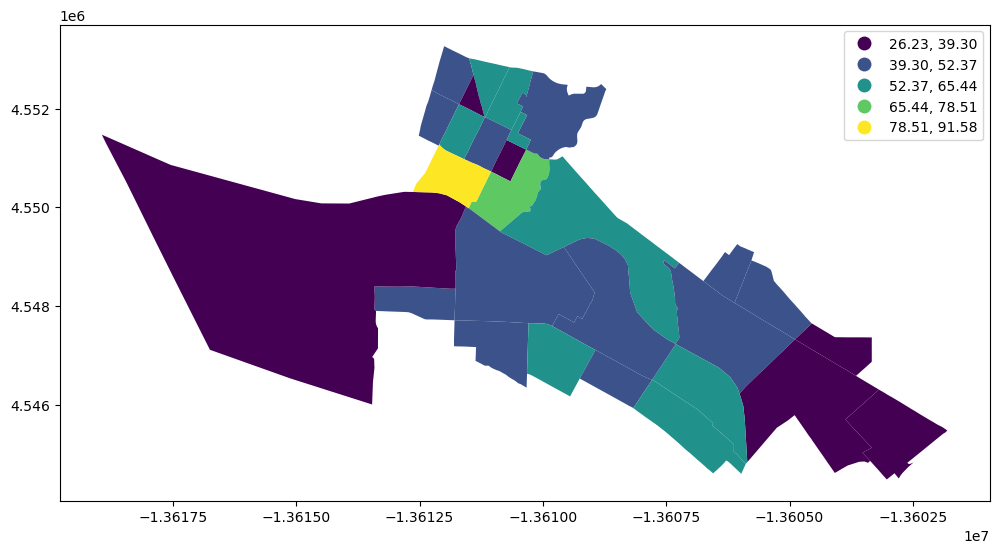

In [46]:
geo_df.plot(figsize=(12,10),
                 column='PCT_Notrentburdened',
                 legend=True, 
                 scheme='equal_interval')

##### I find that the percent of those who are rent burdened tends to be in Alameda and South Oakland. 

In [47]:
geo_df['rentburdened'] = geo_df['30 to 49 percent'] + geo_df['50 percent or more']
geo_df['PCT_rentburdened'] = geo_df['rentburdened']/geo_df['Renter Occupied Housing Units']*100

<AxesSubplot: >

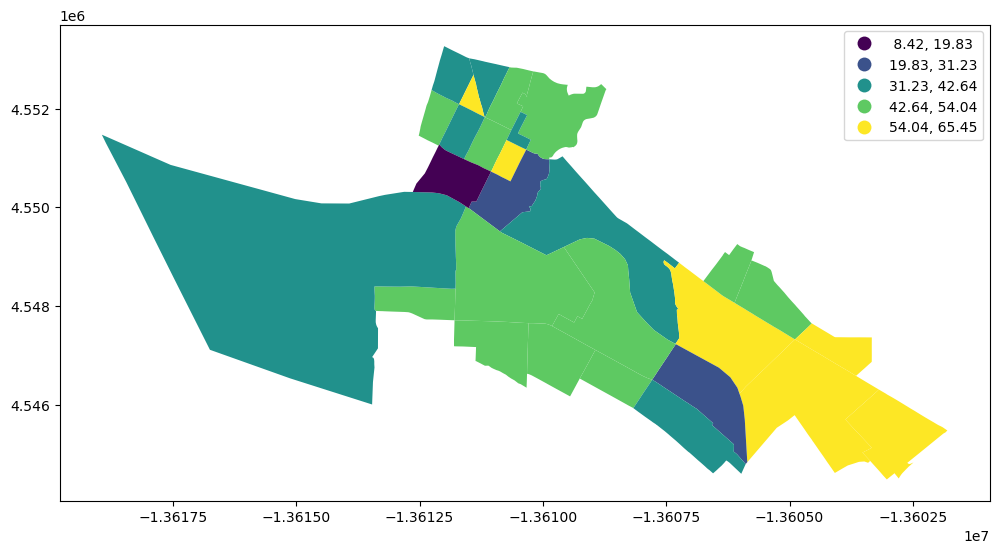

In [48]:
geo_df.plot(figsize=(12,10),
                 column='PCT_rentburdened',
                 legend=True, 
                 scheme='equal_interval')

##### Here I review plotly, unrelated to final project. 

In [1]:
import pandas as pd

In [2]:
import plotly.express as px

In [3]:
from sodapy import Socrata

##### I import data from LA City on registered foreclosures in 2014.

In [4]:
client = Socrata("data.lacity.org", None)

In [5]:
results = client.get("fdwe-pgcu", limit=2000)

In [6]:
foreclosure = pd.DataFrame.from_records(results)

In [7]:
foreclosure.sample(2)

apn           registereddate  property_type  \
849  5043015020  2014-11-25T00:00:00.000   Multi-Family   
340  2316011037  2014-10-27T00:00:00.000  Single Family   

                                     property_location zip_code  cd  \
849  {'latitude': '34.028881427000044', 'longitude'...    90016  10   
340  {'latitude': '34.20679069400006', 'longitude':...    91605   2   

                                                lender lendercontact  \
849                                         NationStar  Paula Acosta   
340  Bank of New York Mellon C/O Select Portfolio S...         NA NA   

    lendercontactphone    propertymanagement       propertymgmtcontact  \
849       972-315-8837               MCS/687  MCS Advantage Conveyance   
340       888-349-8964  Safeguard Properties      Safeguard Properties   

    propertycontactphone :@computed_region_qz3q_ghft  \
849         949-642-4801                       23077   
340         877-340-0060                        8888   

    :@computed_region_k96s_3jcv :@computed_region_tatf_ua23  \
849                         665                         986   
340                         169                         478   

    :@computed_region_ur2y_g4cx :@computed_region_kqwf_mjcx  \
849                         NaN                          12   
340                         NaN                           5   

    :@computed_region_2dna_qi2s                           propmgmt_address  
849                          17  1906   Irvine AVE  Newport Beach CA 92660  
340                          14    7887   Safeguard   Valley View OH 44125

In [8]:
foreclosure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   apn                          2000 non-null   object
 1   registereddate               2000 non-null   object
 2   property_type                2000 non-null   object
 3   property_location            2000 non-null   object
 4   zip_code                     2000 non-null   object
 5   cd                           2000 non-null   object
 6   lender                       2000 non-null   object
 7   lendercontact                2000 non-null   object
 8   lendercontactphone           2000 non-null   object
 9   propertymanagement           2000 non-null   object
 10  propertymgmtcontact          2000 non-null   object
 11  propertycontactphone         2000 non-null   object
 12  :@computed_region_qz3q_ghft  2000 non-null   object
 13  :@computed_region_k96s_3jcv  1995

##### I plot the frequency of property types as they were foreclosed. 

In [10]:
fig = px.bar(foreclosure,
       x='property_type',
       title='Property Type Foreclosures'
      )

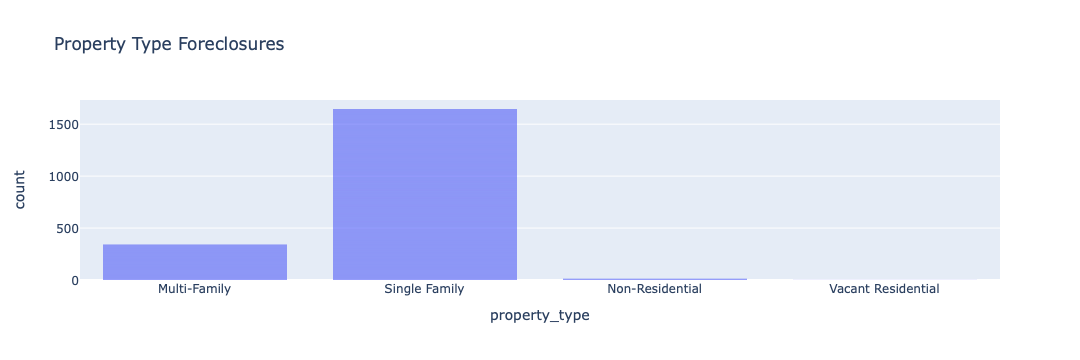

In [11]:
fig.update_traces(marker_line_width=0)

##### I realize that the longitude and latitude in this dataset are combined, so I look for another dataset where they are separated for me to plot. 

In [13]:
client = Socrata("data.lacity.org", None)

##### I import data on parking violations from LA City. 

In [14]:
results = client.get("wjz9-h9np", limit=2000)

In [15]:
parking = pd.DataFrame.from_records(results)

In [16]:
parking.sample(2)

ticket_number               issue_date issue_time rp_state_plate  \
699    4271997634  2015-12-30T00:00:00.000       1105             CA   
18     1107539834  2015-09-16T00:00:00.000       1045             CA   

    plate_expiry_date  make body_style color            location  route  \
699            201602  OTHR         PA    WT       7210 LEMP AVE  00394   
18                NaN  CHEV         PA    BK  1246 S FIGUEROA ST   1L20   

    agency violation_code violation_description fine_amount latitude  \
699     53        80.69BS  NO PARK/STREET CLEAN          73    99999   
18       1         8069AP      NO STOP/STAND PM          93    99999   

    longitude meter_id marked_time  
699     99999      NaN         NaN  
18      99999      NaN         NaN

In [17]:
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ticket_number          2000 non-null   object
 1   issue_date             2000 non-null   object
 2   issue_time             1999 non-null   object
 3   rp_state_plate         2000 non-null   object
 4   plate_expiry_date      1872 non-null   object
 5   make                   1996 non-null   object
 6   body_style             1992 non-null   object
 7   color                  1993 non-null   object
 8   location               1999 non-null   object
 9   route                  1978 non-null   object
 10  agency                 2000 non-null   object
 11  violation_code         2000 non-null   object
 12  violation_description  2000 non-null   object
 13  fine_amount            1989 non-null   object
 14  latitude               2000 non-null   object
 15  longitude            

In [20]:
parking['latitude'] = parking['latitude'].astype(float)
parking['longitude'] = parking['longitude'].astype(float)
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ticket_number          2000 non-null   object 
 1   issue_date             2000 non-null   object 
 2   issue_time             1999 non-null   object 
 3   rp_state_plate         2000 non-null   object 
 4   plate_expiry_date      1872 non-null   object 
 5   make                   1996 non-null   object 
 6   body_style             1992 non-null   object 
 7   color                  1993 non-null   object 
 8   location               1999 non-null   object 
 9   route                  1978 non-null   object 
 10  agency                 2000 non-null   object 
 11  violation_code         2000 non-null   object 
 12  violation_description  2000 non-null   object 
 13  fine_amount            1989 non-null   object 
 14  latitude               2000 non-null   float64
 15  long

##### I plot the data according to latitude and longitude. I realize many lat and long inputs are either missing or have invalid 9999 inputs. So I look for another dataset. 

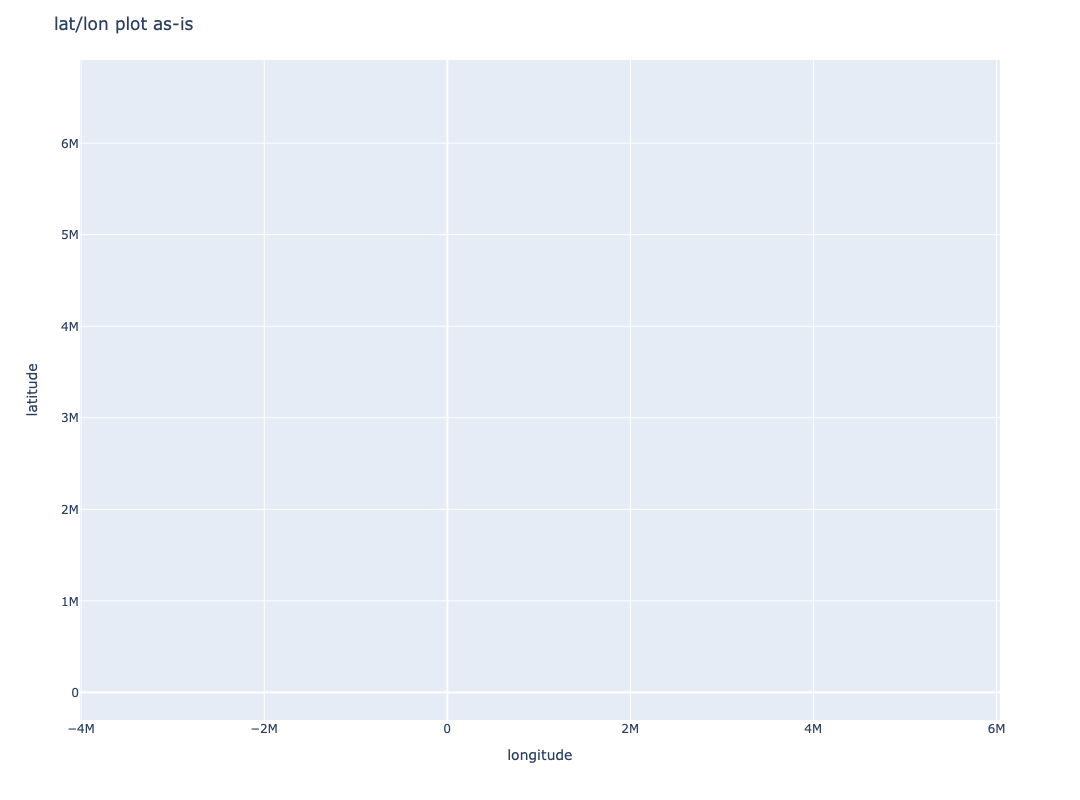

In [22]:
fig = px.scatter(parking,
           x='longitude',
           y='latitude'
)

fig.update_layout(
    width = 800,
    height = 800,
    title = "lat/lon plot as-is"
)

fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)

fig.show()

##### This time I find another dataset, food resources in California, that has the relevant lat and long inputs. 

In [59]:
client = Socrata("data.lacity.org", None)

results = client.get("v2mg-qsxf", limit=2000)

food = pd.DataFrame.from_records(results)

food.sample(2)

name            street_address  \
736  Second Harvest Food Bank Of Orange County  2695 East Katella Avenue   
382                Ellen Ochoa Learning Center         5027 Live Oak St.   

        city state zip_code       county phone  \
736  Anaheim    CA    92806       Orange   NaN   
382   Cudahy    CA    90201  Los Angeles   NaN   

                                           description  \
736  Offers a one-day drive-thru food distribution ...   
382                                LOCAL DISTRICT EAST   

                 resource_type  \
736                Food Pantry   
382  Food Distribution Program   

                                              web_link   latitude  \
736  {'url': 'https://www.211oc.org/food/groceries....  33.807851   
382  {'url': 'https://ellenochoa-lausd-ca.schoolloo...  33.960662   

       longitude notes  
736  -117.876577   NaN  
382  -118.174216   NaN

In [60]:
food['latitude'] = food['latitude'].astype(float)
food['longitude'] = food['longitude'].astype(float)
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1852 non-null   object 
 1   street_address  1852 non-null   object 
 2   city            1849 non-null   object 
 3   state           1851 non-null   object 
 4   zip_code        1852 non-null   object 
 5   county          1852 non-null   object 
 6   phone           1479 non-null   object 
 7   description     1746 non-null   object 
 8   resource_type   1852 non-null   object 
 9   web_link        1843 non-null   object 
 10  latitude        1852 non-null   float64
 11  longitude       1852 non-null   float64
 12  notes           44 non-null     object 
dtypes: float64(2), object(11)
memory usage: 188.2+ KB


##### Next I plot the data using plotly and notice that the data is highly dispersed around California.

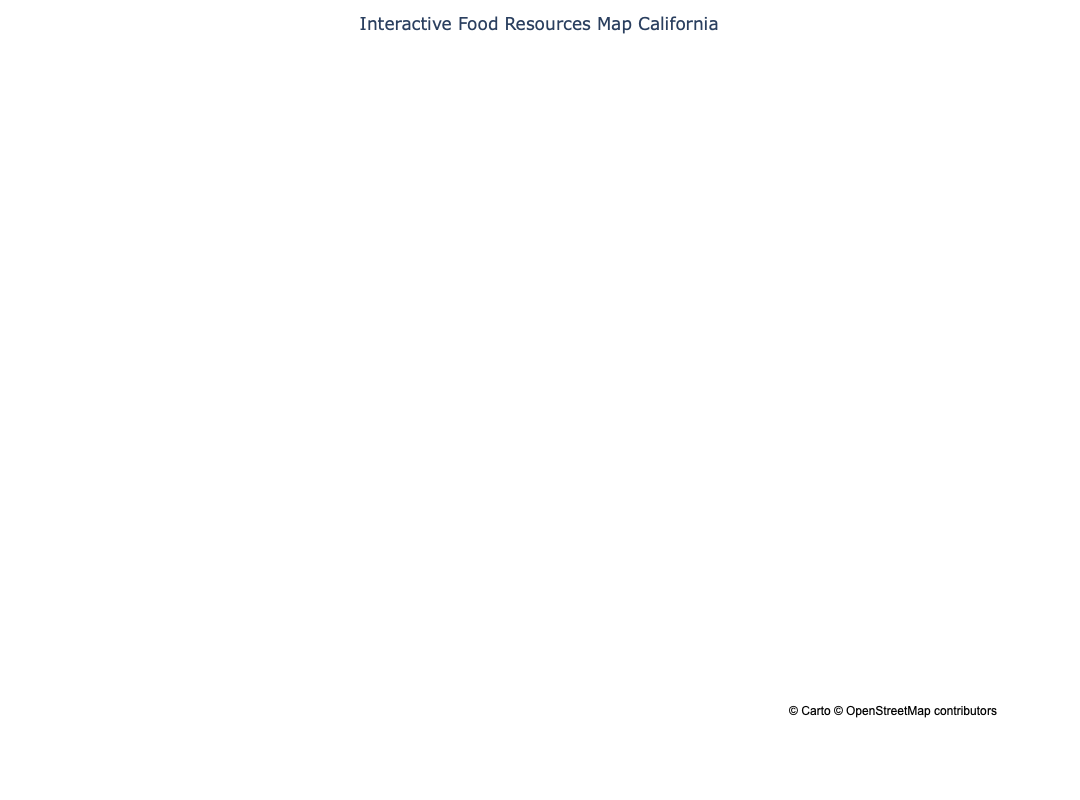

In [61]:
fig = px.scatter_mapbox(food,
                        lat='latitude',
                        lon='longitude',
                        mapbox_style="carto-positron")

fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Food Resources Map California",
    title_x=0.5 
)

fig.show()

##### Next I color code the individual cities represented, but find there are many cities in this dataset.

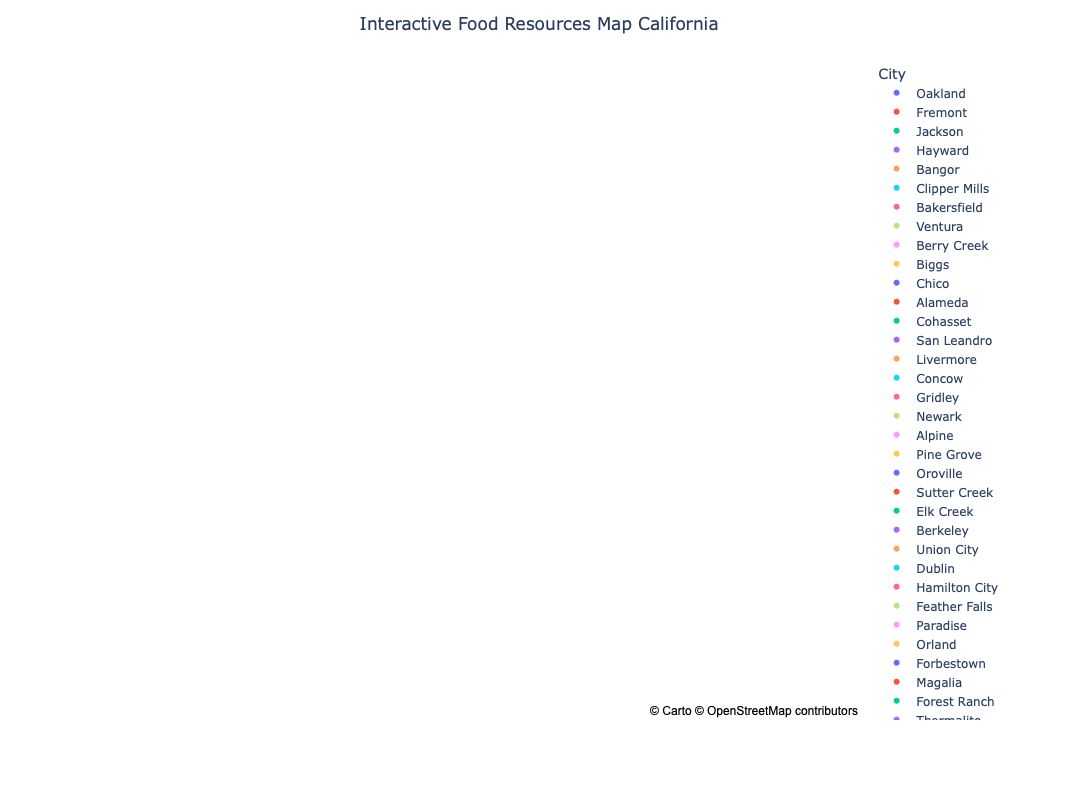

In [62]:
fig = px.scatter_mapbox(food, 
                        lat="latitude", 
                        lon="longitude", 
                        color="city",
                        labels={'city':'City'},
                        mapbox_style="carto-positron"
                       )

# options on the layout
fig.update_layout(
    width = 800,
    height = 800,
    title = "Interactive Food Resources Map California",
    title_x=0.5
)


fig.show()

##### Next I isolate by city, in this case Oakland. 

In [63]:
def city_map(city='Oakland'):
    
    fig = px.scatter_mapbox(
                            food[food.city==city], 
                            lat="latitude", 
                            lon="longitude", 
                            color="city",
                            labels={'city':'City'},
                            mapbox_style="carto-positron"
    )

    # options on the layout
    fig.update_layout(
        width = 600,
        height = 600,
        title = "Interactive Food Resources Map<br>Showing where city label is "+city,
        title_x=0.5 
    )

    fig.show()

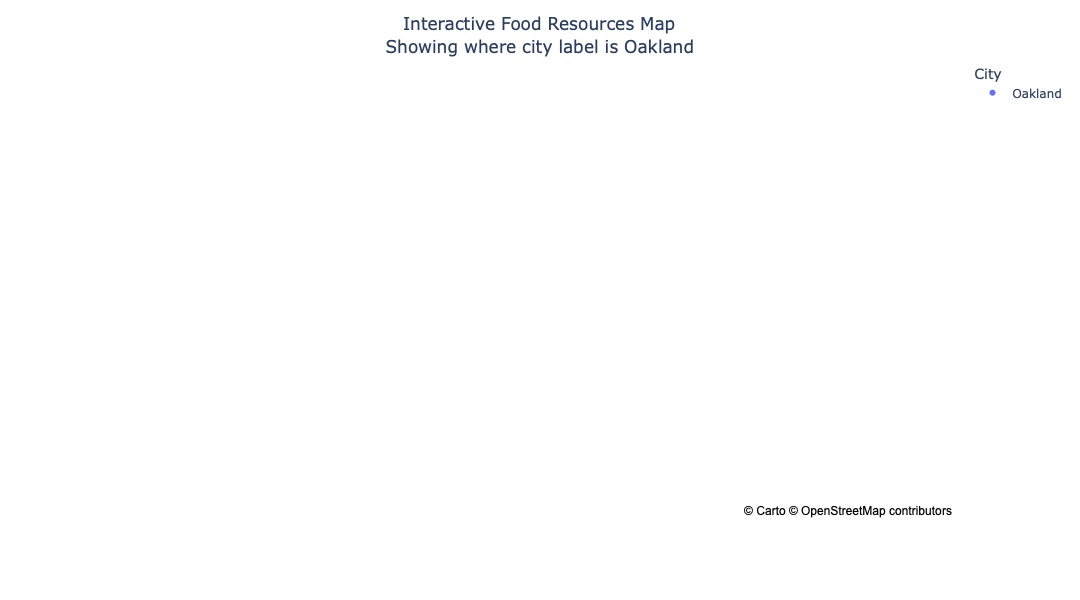

In [64]:
city_map(city='Oakland')

##### I list out all the cities, and find there are too many to create a loop.

In [65]:
city_list = food.city.unique().tolist()
city_list

['Oakland',
 'Fremont',
 'Jackson',
 'Hayward',
 'Bangor',
 'Clipper Mills',
 'Bakersfield',
 'Ventura',
 'Berry Creek',
 'Biggs',
 'Chico',
 'Alameda',
 'Cohasset',
 'San Leandro',
 'Livermore',
 'Concow',
 'Gridley',
 'Newark',
 'Alpine',
 'Pine Grove',
 'Oroville',
 'Sutter Creek',
 'Elk Creek',
 'Berkeley',
 'Union City',
 'Dublin',
 'Hamilton City',
 'Feather Falls',
 'Paradise',
 'Orland',
 'Forbestown',
 'Magalia',
 'Forest Ranch',
 'Thermalito',
 'Palermo',
 'Stirling City',
 'San Andreas',
 'Angels Camp',
 'Colusa',
 'Bay Point',
 'Antioch',
 'Rodeo',
 'Richmond',
 'Martinez',
 'Brentwood',
 'Pittsburg',
 'Concord',
 'San Pablo',
 'Hercules',
 'El Sobrante',
 'North Richmond',
 'Bethel Island',
 'Pleasant Hill',
 'Oakley',
 'Walnut Creek',
 'Crescent City',
 'Cameron Park',
 'Diamond Springs',
 'El Dorado Hills',
 'Greenwood',
 'Fairplay',
 'Placerville',
 'Pollock Pines',
 'South Lake Tahoe',
 'Fresno',
 'Willows',
 'Arcata',
 'Eureka',
 'Blue\xa0Lake',
 'Blue Lake',
 'Bridge

##### Since there are too many cities to be doing a loop, I select three cities.

In [66]:
food = food.loc[(food['city'] == 'Oakland') | (food['city'] == 'Fremont') |
                    (food['city'] == 'Hayward')]
food

name                street_address  \
0        Agnes Memorial Church Of God In Christ  2372 International Boulevard   
1            Alameda County Community Food Bank          7900 Edgewater Drive   
2                            Salaam Food Pantry         4039 Irvington Avenue   
5                         South Hayward Parrish          27287 Patrick Avenue   
6                       St. Elizabeth's Parrish            1500 - 34th Avenue   
22                   Telegraph Community Center         5316 Telegraph Avenue   
33  Brookins African Methodist Episcopal Church            2201 - 73rd Avenue   
37                 Eden United Church Of Christ            21455 Birch Street   
38         Mount Zion Missionary Baptist Church            1203 Willow Street   
39                    New Life Christian Church                 1265 B Street   

       city state zip_code   county         phone  \
0   Oakland    CA    94601  Alameda  510-533-1101   
1   Oakland    CA    94621  Alameda  510-635-3663   
2   Fremont    CA    94538  Alameda  415-860-2409   
5   Hayward    CA    94544  Alameda  510-785-3663   
6   Oakland    CA    94601  Alameda  510-536-1266   
22  Oakland    CA    94609  Alameda  510-658-4457   
33  Oakland    CA    94605  Alameda  510-568-8954   
37  Hayward    CA    94541  Alameda  510-582-9533   
38  Oakland    CA    94607  Alameda  510-893-2932   
39  Hayward    CA    94541  Alameda  510-889-1304   

                                          description  \
0   Partners with the City of Oakland's Hunger Rel...   
1   Call our Helpline at: 1-800-870-FOOD (3663) or...   
2   Provides non-perishable grocery bags for needy...   
5   A coalition of 7 Hayward congregations which p...   
6                                                 NaN   
22  Community agency which operates food pantry, a...   
33  Serves breakfast to low-income residents of Oa...   
37  FOOD PANTRY 2nd & 4th Wednesdays From 1:30 unt...   
38  Food giveaway every Friday, 11-12. Offers vari...   
39  Anyone in need of food, New Life welcomes them...   

                 resource_type  \
0                  Food Pantry   
1                    Food Bank   
2                  Food Pantry   
5                  Food Pantry   
6                  Food Pantry   
22                 Food Pantry   
33                 Food Pantry   
37                 Food Pantry   
38  Nutrition Services Program   
39                 Food Pantry   

                                             web_link   latitude   longitude  \
0           {'url': 'http://agnesmemorialchurch.com'}  37.783047 -122.234238   
1                   {'url': 'https://www.accfb.org/'}  37.741538 -122.201300   
2             {'url': 'http://salaamfoodpantry.org/'}  37.531391 -121.959689   
5           {'url': 'http://southhaywardparish.org/'}  37.634013 -122.079671   
6        {'url': 'http://www.saintelizabethoak.org/'}  37.778045 -122.222403   
22         {'url': 'http://www.telegraphcenter.com/'}  37.838990 -122.262030   
33  {'url': 'http://www.alamedacounty.info/content...  37.764172 -122.180174   
37  {'url': 'https://foodnow.net/location/eden-uni...  37.681266 -122.093415   
38       {'url': 'http://www.berkeleymtzionmbc.org/'}  37.811861 -122.297833   
39  {'url': 'http://www.newlifechristianchurch.com/'}  37.675848 -122.078014   

   notes  
0    NaN  
1    NaN  
2    NaN  
5    NaN  
6    NaN  
22   NaN  
33   NaN  
37   NaN  
38   NaN  
39   NaN

##### Create a loop of the three cities.

In [67]:
city_list = food.city.unique().tolist()
city_list

['Oakland', 'Fremont', 'Hayward']

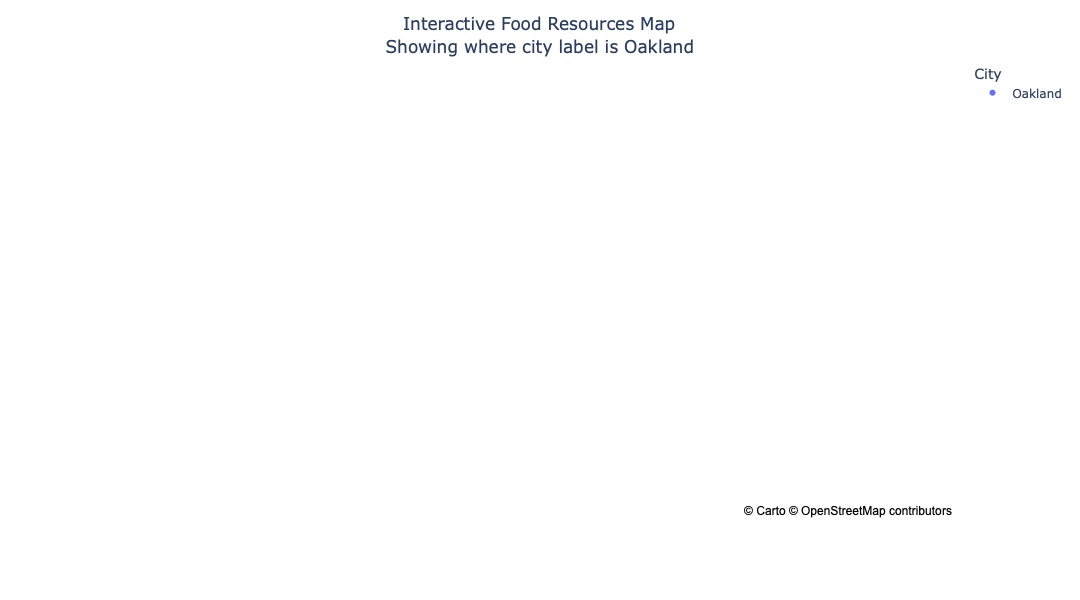

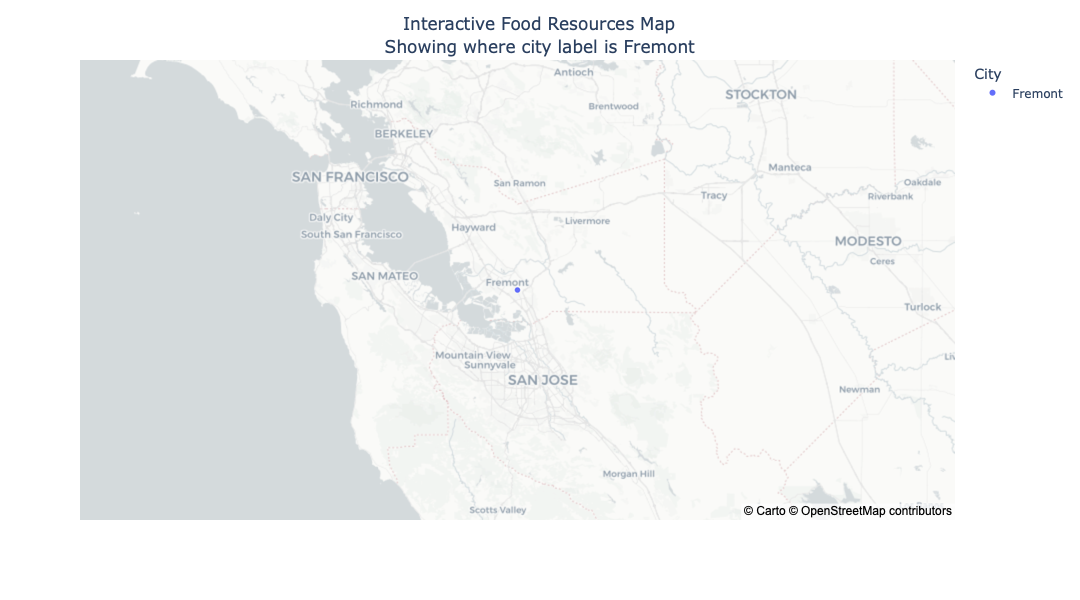

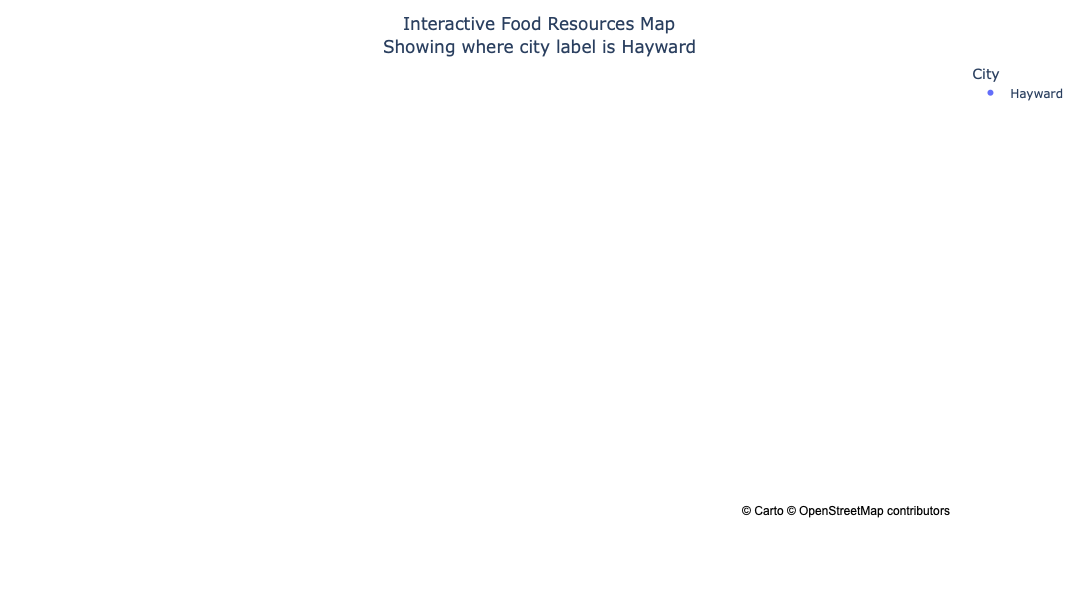

In [69]:
for city in city_list:
    city_map(city)